# Analyzing Exam Scores

## Background
At this school, every students take year-end math, reading, and writing exams. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data
The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

In [2]:
df = pd.read_csv("exams.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,bachelor's degree,standard,completed,71,77,72
1,female,group C,some high school,standard,none,54,67,66
2,female,group D,associate's degree,standard,none,63,62,61
3,female,group E,some college,standard,none,87,85,82
4,female,group C,master's degree,free/reduced,none,67,85,82


## What to Do
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

### 1. The Average Reading Scores for Students with/without the Test Preparation Course

In [4]:
df.groupby("test preparation course").mean()[["reading score"]]

,reading score
test preparation course,
completed,74.046584
none,67.929204


### 2. The Average Scores for Different Parental Education Levels

In [5]:
df.groupby("parental level of education").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,68.596154,71.211538,69.841346
bachelor's degree,71.300000,74.783333,74.400000
high school,64.253589,67.258373,65.660287
master's degree,73.508475,75.084746,74.254237
some college,65.676471,68.869748,67.844538
some high school,65.403614,67.680723,65.765060


### 3. Plots to Visualize Findings for Questions 1 and 2

#### Plot 1

In [6]:
df_plot1 = df.groupby("test preparation course").mean()[["reading score"]].reset_index(level=0)

In [7]:
df_plot1

,test preparation course,reading score
0,completed,74.046584
1,none,67.929204


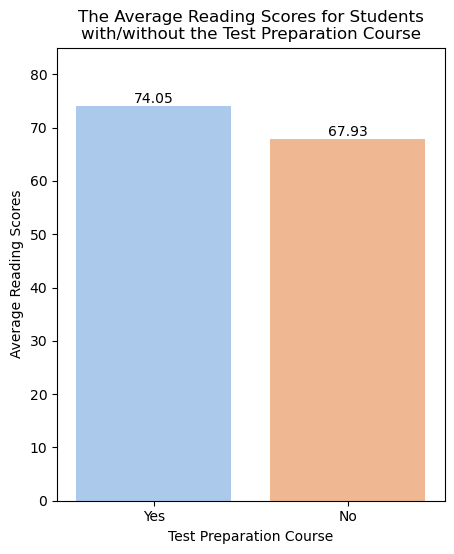

In [8]:
plt.figure(figsize=(5,6),dpi=100)
ax = sns.barplot(data=df_plot1,x="test preparation course",y=round(df_plot1["reading score"],2),palette="pastel")
ax.bar_label(ax.containers[0])
plt.title("The Average Reading Scores for Students\nwith/without the Test Preparation Course",fontsize=12)
plt.xlabel("Test Preparation Course")
plt.xticks(ticks=range(0,len(df_plot1["test preparation course"])),labels=["Yes","No"])
plt.ylabel("Average Reading Scores")
plt.ylim(0,85)
plt.show()

#### Plot 2

In [9]:
df_plot2 = df.groupby("parental level of education").mean()[["math score","reading score","writing score"]].reset_index(level=0)

In [10]:
df_plot2_1 = df_plot2[["parental level of education","math score"]]
df_plot2_1 = df_plot2_1.rename(columns={"math score":"score"})

df_plot2_2 = df_plot2[["parental level of education","reading score"]]
df_plot2_2 = df_plot2_2.rename(columns={"reading score":"score"})

df_plot2_3 = df_plot2[["parental level of education","writing score"]]
df_plot2_3 = df_plot2_3.rename(columns={"writing score":"score"})

In [11]:
df_plot2 = pd.concat([df_plot2_1,df_plot2_2,df_plot2_3])

In [12]:
df_plot2["subjects"] = ["math","math","math","math","math","math","reading","reading","reading","reading","reading","reading","writing","writing","writing","writing","writing","writing"]

In [13]:
df_plot2.head()

,parental level of education,score,subjects
0,associate's degree,68.596154,math
1,bachelor's degree,71.300000,math
2,high school,64.253589,math
3,master's degree,73.508475,math
4,some college,65.676471,math


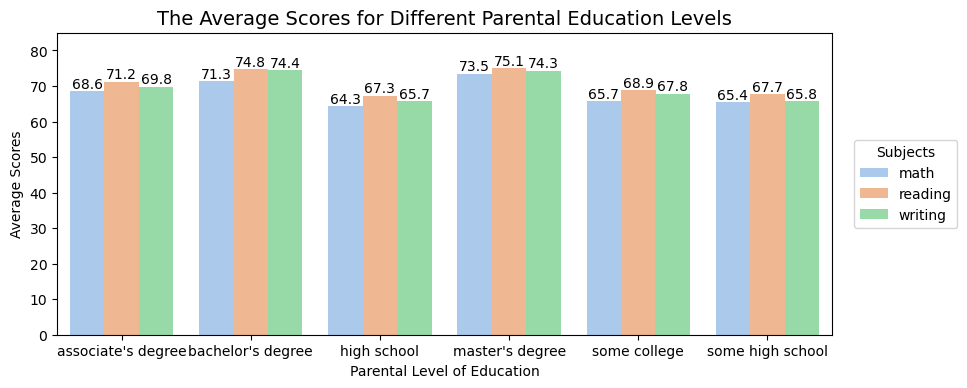

In [14]:
plt.figure(figsize=(10,4),dpi=100)
ax = sns.barplot(data=df_plot2,x="parental level of education",y=round(df_plot2["score"],1),hue="subjects",palette="pastel")
for container in ax.containers:
    ax.bar_label(container)
plt.title("The Average Scores for Different Parental Education Levels",fontsize=14)
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Scores")
plt.ylim(0,85)
plt.legend(title="Subjects",bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()

### 4. The Average Scores for Students with/without the Test Preparation Course for Different Parental Education Levels

In [15]:
df_4 = df.groupby(["test preparation course","parental level of education"]).mean()[["math score","reading score","writing score"]].reset_index(level=0).reset_index(level=0)

In [16]:
df_4.head()

,parental level of education,test preparation course,math score,reading score,writing score
0,associate's degree,completed,72.892308,74.876923,76.153846
1,bachelor's degree,completed,75.750000,80.361111,81.472222
2,high school,completed,66.560606,71.166667,71.181818
3,master's degree,completed,78.857143,80.285714,81.428571
4,some college,completed,71.243902,73.695122,74.243902


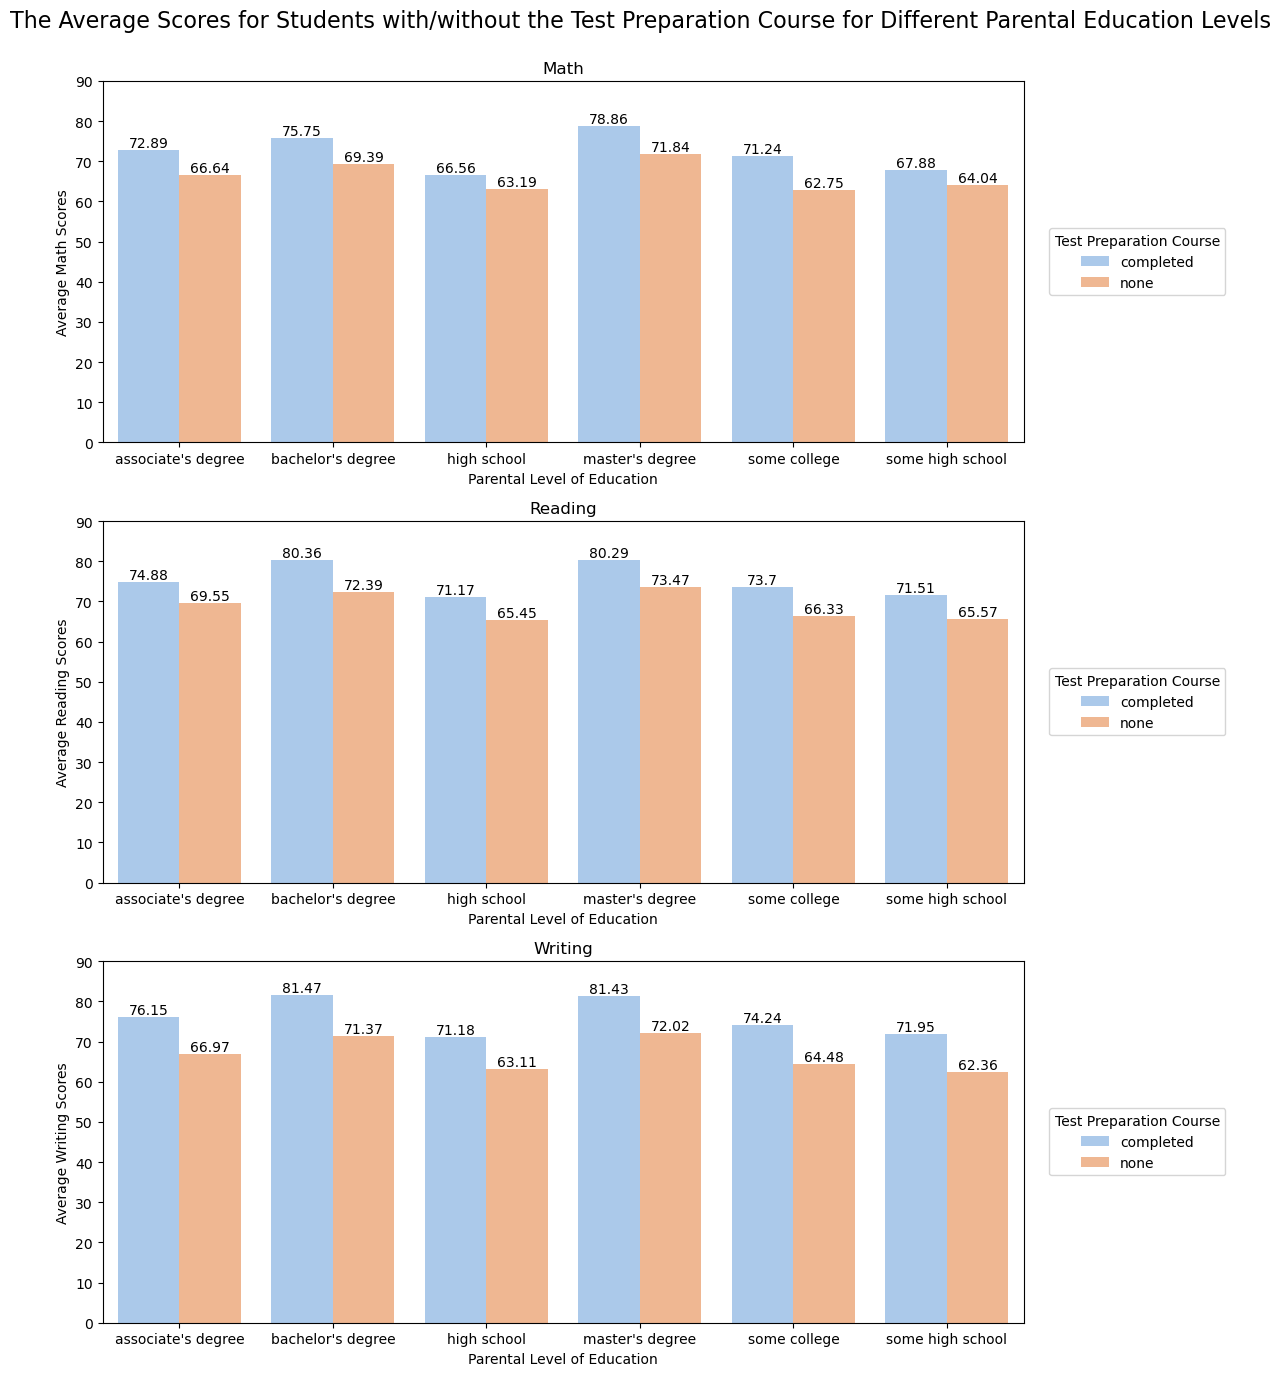

In [17]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(12,14),dpi=100)

axes[0] = sns.barplot(ax=axes[0],data=df_4,x="parental level of education",y=round(df_4["math score"],2),hue="test preparation course",palette="pastel")
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_title("Math")
axes[0].set_xlabel("Parental Level of Education")
axes[0].set_ylim(0,90)
axes[0].set_ylabel("Average Math Scores")
axes[0].legend(title="Test Preparation Course",bbox_to_anchor=(1.02,0.5),loc="center left")

axes[1] = sns.barplot(ax=axes[1],data=df_4,x="parental level of education",y=round(df_4["reading score"],2),hue="test preparation course",palette="pastel")
for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_title("Reading")
axes[1].set_xlabel("Parental Level of Education")
axes[1].set_ylim(0,90)
axes[1].set_ylabel("Average Reading Scores")
axes[1].legend(title="Test Preparation Course",bbox_to_anchor=(1.02,0.5),loc="center left")

axes[2] = sns.barplot(ax=axes[2],data=df_4,x="parental level of education",y=round(df_4["writing score"],2),hue="test preparation course",palette="pastel")
for container in axes[2].containers:
    axes[2].bar_label(container)
axes[2].set_title("Writing")
axes[2].set_xlabel("Parental Level of Education")
axes[2].set_ylim(0,90)
axes[2].set_ylabel("Average Writing Scores")
axes[2].legend(title="Test Preparation Course",bbox_to_anchor=(1.02,0.5),loc="center left")

fig.suptitle("The Average Scores for Students with/without the Test Preparation Course for Different Parental Education Levels\n",fontsize=16)

plt.tight_layout()
plt.show()

### 5. Correlations Between Scores

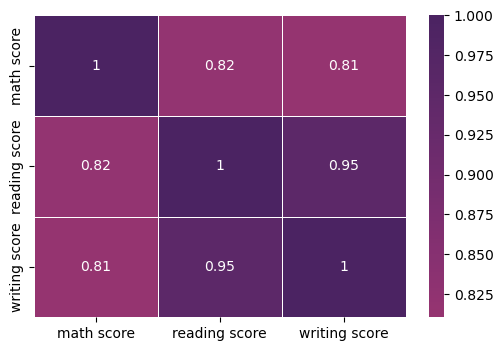

In [18]:
plt.figure(dpi=100)
sns.heatmap(data=df.corr(),linewidth=0.5,annot=True,cmap="flare",center=0.7)
plt.show()

### 6. Conclusion
The analysis suggests that the students who took the test preparation have higher average scores on each subject than those who didn't. The levels of education of the students' parents also have an effect, especially if we compare between students whose parents have graduated from university and high school. Students who have a good score on one subject tend to also have good scores on others.